# Quick Alert!
# ORIGINAL WORK STARTS FROM "MFCC Feature Extraction" 

In [2]:
from entropy import *
import numpy as np
np.random.seed(1234567)
x = np.random.rand(3000)

In [4]:
print(perm_entropy(x, order=3, normalize=True))                 # Permutation entropy
print(spectral_entropy(x, 100, method='welch', normalize=True)) # Spectral entropy
print(svd_entropy(x, order=3, delay=1, normalize=True))         # Singular value decomposition entropy
print(app_entropy(x, order=2, metric='chebyshev'))              # Approximate entropy
print(sample_entropy(x, order=2, metric='chebyshev'))           # Sample entropy
print(lziv_complexity('01111000011001', normalize=True))

0.9995858289645746
0.9945519071575192
0.8482185855709181
2.0754913760787277
2.192416747827227
1.3597696150205727


In [5]:
print(katz_fd(x))                 # Katz fractal dimension
print(higuchi_fd(x, kmax=10))     # Higuchi fractal dimension
print(detrended_fluctuation(x))   # Detrended fluctuation analysis


9.496389529050981
1.9914197968462963
0.5082304865081877


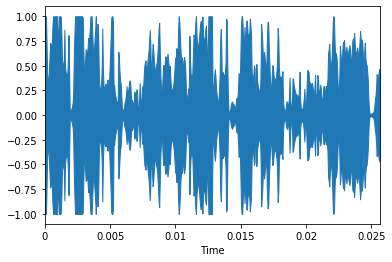

In [728]:
import os 
import librosa
import math
import json
import librosa.display

path = "/Users/Furqan Ali/Desktop/saylani_python/Coursera_learning/cough_mapped_data/positive/00f108bd-dbe0-43f9-ac29-681a56551ef5_1587193769.wav"
sr = 22050


# Zero crossing rate
y, sr = librosa.load(path, sr = sr)
zc = librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=12, n_fft=4096)

# zc = librosa.feature.zero_crossing_rate(y)

# print(spectral_entropy(zc, 100, method='welch', normalize=True))

librosa.display.waveplot(zc[0], sr)

In [701]:
# for extracting chroma cq
cq = librosa.feature.chroma_cqt(y=zc[0], sr=sr)
cq.shape

(12, 2)

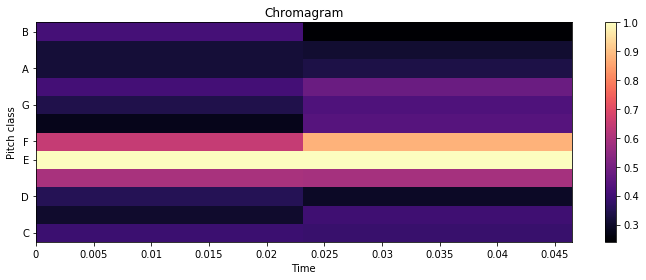

In [702]:
# for plotting chroma graph

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

In [751]:
# cq = cq.reshape(cq.shape[0]* cq.shape[1])
rms = librosa.feature.rms(y=y)
rms_sha = rms.reshape(rms.shape[0]*rms.shape[1])
S = np.abs(librosa.stft(rms_sha))
p2 = librosa.feature.poly_features(S=S, order=2)
# mfcc = librosa.feature.mfcc(y,
#                             sr =sr,
#                             n_fft = 4096,
#                             n_mfcc = 13,
#                             hop_length = 512
#                             )

# mfcc = mfcc.reshape(mfcc.shape[0]*mfcc.shape[1])

# zcr = librosa.feature.zero_crossing_rate(mfcc)
# zcr = zcr.T
# zcr = zcr.reshape(zcr.shape[0]*zcr.shape[1])
# print(zcr.shape)
# print(mfcc.shape)
print(rms_sha.shape)
print(S.shape)
print(p2.shape)
# print(cq.shape)

(566,)
(1025, 2)
(3, 2)


In [749]:
scale1 = librosa.fmt(y, n_fmt=512, kind = 'linear',  beta=0.5)
print(scale1.shape)

(257,)


C:\Users\Furqan Ali\Anaconda3\envs\tensorflow_env\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


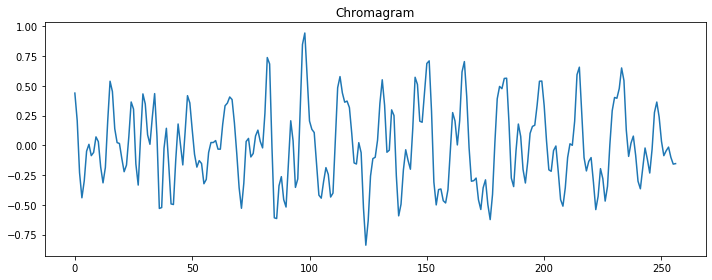

In [745]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(scale1, label='Original')
plt.title('Chromagram')
plt.tight_layout()
plt.show()

# MFCC Feature Extraction

In [63]:
import os 
import librosa
import math
import json


DATASET_PATH = "cough_cleaned_touseef"
JSON_PATH = "Covid1.json"
SAMPLE_RATE = 22050
DURATION = 8  # measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    # 1) Loop through all the genres
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                
                # laoding audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    # for each segment in a signal/sound we need start sample and finish sample value.
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment  # if s=0 -> num_segments_per_sample
                    
                    mfcc = librosa.feature.mfcc(signal[start_sample: finish_sample],
                                                sr =sr,
                                                n_fft = n_fft,
                                                n_mfcc = n_mfcc,
                                                hop_length = hop_length
                                                )
                    
                    mfcc = mfcc.T   # making mfcc vector suitable to our DL model.
                    
                    # store mfcc vector for each segment, if it has the expected length. 
                    if len(mfcc) == expected_no_of_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                        # to first convert it into list.
                        
                        data["labels"].append(i-1)
                        # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                        # iteration we were not inside the dir containing all the genres folder. 
                        
                        print("{}, segment : {}".format(file_path, s))
                
    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 8)
                


 Processing Negative-con
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg

cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-13.wav, segment : 0
cough_cleaned_

# Training SVM model 1

In [236]:
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json

DATASET_PATH = "Covid1.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=40)


# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))

norm_train = preprocessing.normalize(training)
norm_test = preprocessing.normalize(test)


# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C=50.0, gamma=0.00001)
clf.fit(norm_train, y_train)
acc = clf.score(norm_test, y_test)
print("acc=%0.3f" % acc)


fitting...
acc=0.447


In [244]:
# THis is for standardizing ur data

train_X = preprocessing.scale(training)

In [130]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json

DATASET_PATH = "Covid1.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=40)


# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C=20.0, gamma=0.000001)
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)


fitting...
acc=0.660


In [131]:
# changing gama range

In [208]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json

DATASET_PATH = "Covid1.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=40)

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C=9, gamma=0.000001)
# min no of c at which accuracy doesnt decrease
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)


fitting...
acc=0.660


# Changing Random State

In [285]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score


DATASET_PATH = "Covid1.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=10)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C=9, gamma=0.000001)
# min no of c at which accuracy doesnt decrease
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)
predicted=clf.predict(test)
print("The accuracy score on test set is :",  accuracy_score(y_test,predicted))


fitting...
acc=0.718
The accuracy score on test set is : 0.7184466019417476


#### Doing ONE HOT ENCODING 

In [277]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(y), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)


# RANDOM FOREST

In [301]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics


DATASET_PATH = "Covid1.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=10)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=80)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(training, y_train)

y_pred=clf.predict(test)

# Model Accuracy, how often is the classifier correct?
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))

Testing Accuracy: 0.7378640776699029


# Random_forest_model 2

### changing random_state

In [351]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics


DATASET_PATH = "Covid1.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=40, shuffle=True)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


#Create a Gaussian Classifier
clf=RandomForestClassifier(max_depth=50, random_state=50, n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(training, y_train)

y_pred=clf.predict(test)

# Model Accuracy, how often is the classifier correct
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

Testing Accuracy: 0.6893203883495146


In [382]:
# MODEL 2 with random_state=45

In [383]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics


DATASET_PATH = "Covid1.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=45, shuffle=True)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


#Create a Gaussian Classifier
clf=RandomForestClassifier(max_depth=50, random_state=50, n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(training, y_train)

y_pred=clf.predict(test)

# Model Accuracy, how often is the classifier correct

print("Model is running .....")
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

Model is running .....
Testing Accuracy: 0.7281553398058253


In [384]:
# Model 3

Model is running .....
Testing Accuracy: 0.7864077669902912
0.7713529856386999
Confusion matrix, without normalization
[[42  7]
 [15 39]]


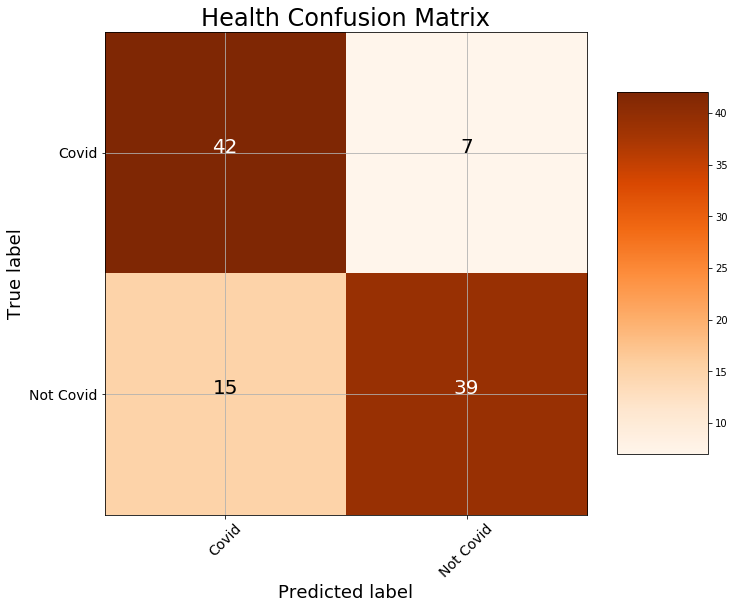

In [618]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics


DATASET_PATH = "Covid1.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=45, shuffle=True)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


#Create a Gaussian Classifier
clf=RandomForestClassifier(max_depth=50, random_state=50, n_estimators=90)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(training, y_train)

y_pred=clf.predict(test)

# Model Accuracy, how often is the classifier correct

print("Model is running .....")
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Probabilities for each class
rf_probs = clf.predict_proba(test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print(roc_value)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'],
                      title = 'Health Confusion Matrix')

plt.savefig('cm78.png')

In [521]:
# Model 4 with normalized data

In [520]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics


DATASET_PATH = "Covid1.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=49, shuffle=True)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


norm_train = preprocessing.normalize(training)
norm_test = preprocessing.normalize(test)


#Create a Gaussian Classifier
clf=RandomForestClassifier(max_depth=800, random_state=200, n_estimators=98)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(norm_train, y_train)

y_pred=clf.predict(norm_test)

# Model Accuracy, how often is the classifier correct

print("Model is running .....")
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

Model is running .....
Testing Accuracy: 0.7184466019417476


In [570]:
# MODEL 5 with normalized data

In [611]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score



DATASET_PATH = "Covid1.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=49, shuffle=True)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


norm_train = preprocessing.normalize(training)
norm_test = preprocessing.normalize(test)


#Create a Gaussian Classifier
clf=RandomForestClassifier(max_depth=7, random_state=200, n_estimators=100, bootstrap = True,
                               max_features = 'sqrt')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(norm_train, y_train)

y_pred=clf.predict(norm_test)

# Model Accuracy, how often is the classifier correct

print("Model is running .....")
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Probabilities for each class
rf_probs = clf.predict_proba(norm_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print(roc_value)


Model is running .....
Testing Accuracy: 0.7475728155339806
0.809811320754717


# Random Forest along with confusion matrix

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.6s finished


{'n_estimators': 48, 'min_samples_split': 5, 'max_leaf_nodes': 37, 'max_features': 0.8999999999999999, 'max_depth': 18, 'bootstrap': True}
Model is running .....
Testing Accuracy: 0.6601941747572816
Confusion matrix, without normalization
[[29 24]
 [11 39]]


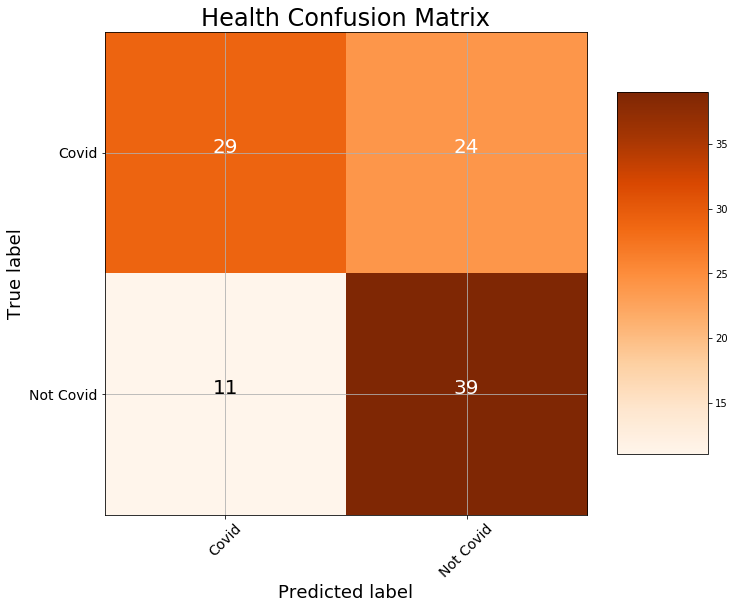

In [648]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score



DATASET_PATH = "Covid1.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=49, shuffle=True)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


norm_train = preprocessing.normalize(training)
norm_test = preprocessing.normalize(test)



# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(max_depth=7, random_state=200, n_estimators=100, bootstrap = True,
#                                max_features = 'sqrt', n_jobs=-2)

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 200)

# Create the random search model
clf = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(norm_train, y_train)
print(clf.best_params_)

best_model = clf.best_estimator_

y_pred=best_model.predict(norm_test)



# Model Accuracy, how often is the classifier correct

print("Model is running .....")
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Probabilities for each class
rf_probs = best_model.predict_proba(norm_test)[:, 1]

# Calculate roc auc
# roc_value = roc_auc_score(y_test, rf_probs)
# print(roc_value)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'],
                      title = 'Health Confusion Matrix')

plt.savefig('cm.png')

# Randomized Search CV

### Model 1

{'C': 1.9784065821520858, 'penalty': 'l1'}
Model is running .....
Testing Accuracy: 0.6699029126213593
0.5547996976568405
Confusion matrix, without normalization
[[33 16]
 [18 36]]


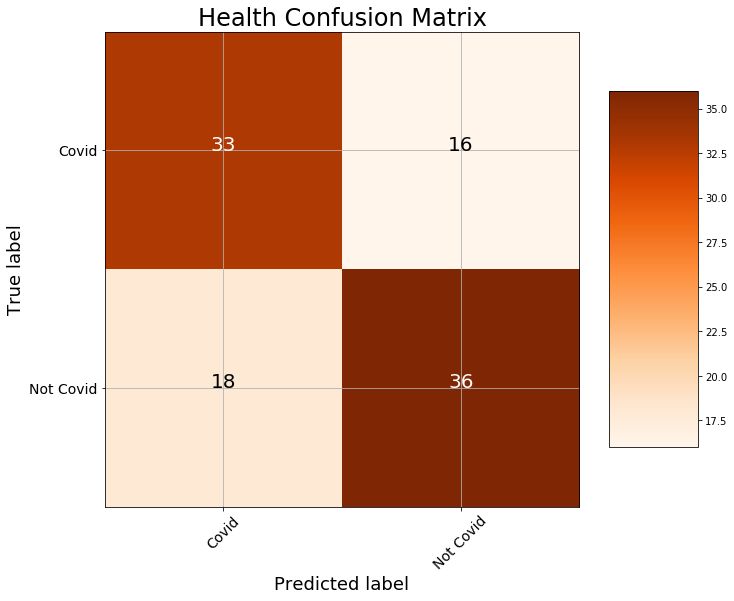

In [672]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform



DATASET_PATH = "Covid1.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=45, shuffle=True)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))



logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=50)

distributions = dict(C=uniform(loc=0, scale=4),
                      penalty=['l2', 'l1'])

clf = RandomizedSearchCV(logistic, distributions, random_state=50)

#Train the model using the training sets y_pred=clf.predict(X_test)

search = clf.fit(training, y_train)
# clf.fit(training, y_train)
print(search.best_params_)

y_pred=clf.predict(test)

# Model Accuracy, how often is the classifier correct

print("Model is running .....")
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Probabilities for each class
rf_probs = clf.predict_proba(norm_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print(roc_value)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'],
                      title = 'Health Confusion Matrix')

# plt.savefig('cm.png')

# Logistic regression
# MODEL 1

C:\Users\Furqan Ali\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model is running .....
Testing Accuracy: 0.6504854368932039
0.565381708238851
Confusion matrix, without normalization
[[34 15]
 [21 33]]


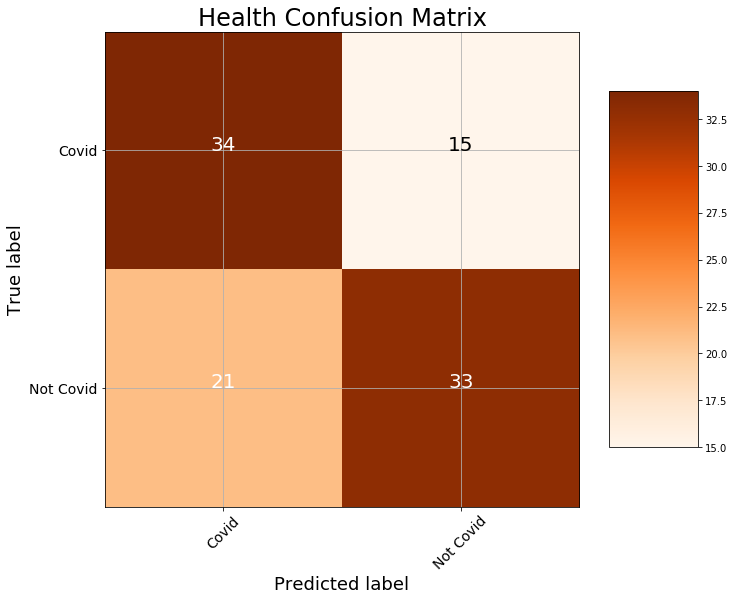

In [670]:
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression



DATASET_PATH = "Covid1.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=45, shuffle=True)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))

# all parameters not specified are set to their defaults
clf = LogisticRegression(C=1300, solver = 'lbfgs')

clf.fit(training, y_train)

y_pred=clf.predict(test)

# Model Accuracy, how often is the classifier correct

print("Model is running .....")
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Probabilities for each class
rf_probs = clf.predict_proba(norm_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print(roc_value)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'],
                      title = 'Health Confusion Matrix')

# plt.savefig('cm.png')

In [671]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65        49
           1       0.69      0.61      0.65        54

    accuracy                           0.65       103
   macro avg       0.65      0.65      0.65       103
weighted avg       0.65      0.65      0.65       103

